In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import os
from torch.utils.data import DataLoader
import torch

import matplotlib.pyplot as plt



In [2]:
food_dict = dict()

def count_images_in_directory(directory):
    subdirectories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    
    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(directory, subdirectory)
        image_files = [f for f in os.listdir(subdirectory_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]
        num_images = len(image_files)
        food_dict[str(subdirectory)] = num_images
        #food_dict.insert(subdirectory, num_images)
        #print(f"Subdirectory: {subdirectory}, Number of Images: {num_images}")

# Replace 'path/to/train' with the actual path to your 'train' directory
directory_path = '/kaggle/input/food-compressed/food/Images/Train'
count_images_in_directory(directory_path)
food_dict

{'Banh cuon': 798,
 'Mi quang': 618,
 'Banh trang nuong': 556,
 'Goi cuon': 598,
 'Banh gio': 448,
 'Bun mam': 541,
 'Canh chua': 577,
 'Nem chua': 379,
 'Bun rieu': 805,
 'Banh duc': 463,
 'Banh pia': 310,
 'Banh canh': 674,
 'Banh khot': 584,
 'Banh bot loc': 503,
 'Banh can': 520,
 'Bun thit nuong': 522,
 'Banh chung': 354,
 'Bun dau mam tom': 640,
 'Banh beo': 451,
 'Banh tet': 480,
 'Cao lau': 432,
 'Chao long': 751,
 'Ca kho to': 473,
 'Bun bo Hue': 1071,
 'Pho': 564,
 'Xoi xeo': 366,
 'Banh mi': 935,
 'Banh xeo': 821,
 'Com tam': 659,
 'Hu tieu': 688}

In [3]:
list(food_dict.keys())

['Banh cuon',
 'Mi quang',
 'Banh trang nuong',
 'Goi cuon',
 'Banh gio',
 'Bun mam',
 'Canh chua',
 'Nem chua',
 'Bun rieu',
 'Banh duc',
 'Banh pia',
 'Banh canh',
 'Banh khot',
 'Banh bot loc',
 'Banh can',
 'Bun thit nuong',
 'Banh chung',
 'Bun dau mam tom',
 'Banh beo',
 'Banh tet',
 'Cao lau',
 'Chao long',
 'Ca kho to',
 'Bun bo Hue',
 'Pho',
 'Xoi xeo',
 'Banh mi',
 'Banh xeo',
 'Com tam',
 'Hu tieu']

In [4]:
sorted_data = sorted(food_dict.items(), key=lambda x: x[1])

# Extracting names and values
names, values = zip(*sorted_data)


In [5]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to the directory containing your images
directory_path = '/kaggle/input/food-compressed/food/Images'

# List all files in the directory
all_files = os.listdir(directory_path)

# Filter for image files (you can customize the list of allowed extensions)
image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]



In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Specify the path to the directory containing your images
directory_path = '/kaggle/input/food-compressed/food/Images'

# List all files in the directory
all_files = os.listdir(directory_path)

# Filter for image files (you can customize the list of allowed extensions)
image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]


In [7]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(30),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

])

In [8]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = self.load_images()

    def load_images(self):
        images = []
        for class_name in self.classes:
            class_path = os.path.join(self.root_dir, class_name)
            for filename in os.listdir(class_path):
                image_path = os.path.join(class_path, filename)
                images.append((image_path, self.class_to_idx[class_name]))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path, label = self.images[idx]
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

# Example usage
dataset = CustomDataset(root_dir="/kaggle/input/food-compressed/food/Images/Train", transform = train_transform)
test_set = CustomDataset(root_dir="/kaggle/input/food-compressed/food/Images/Test", transform = test_transform)
val_set = CustomDataset(root_dir="/kaggle/input/food-compressed/food/Images/Validate", transform = test_transform)

train_loader = DataLoader(dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_set, batch_size=16, shuffle=True)
val_loader = DataLoader(val_set, batch_size=16, shuffle= True)


In [9]:
import torch
import torch.nn as nn
from torchvision.models import regnet_y_16gf, RegNet_Y_16GF_Weights
from torchvision.models import vit_h_14, ViT_H_14_Weights

model_name = "vit_h_14"
model = vit_h_14(weights=ViT_H_14_Weights.IMAGENET1K_SWAG_LINEAR_V1)
num_classes = 30
# # Chung m uncomment may dong nay
for param in model.parameters():
    param.requires_grad = False

# num_ftrs = model.fc.in_features  # Assuming fc is the last layer of your ConvNext model
# model.fc = nn.Linear(num_ftrs, num_classes)  # Assuming num_classes is the number of classes in your dataset
# for param in model.fc.parameters():
#     param.requires_grad = True
    
# model
# model
model.heads[0] = nn.Linear(1280, 30)
for param in model.heads[0].parameters():
    param.requires_grad = True
    
model

Downloading: "https://download.pytorch.org/models/vit_h_14_lc_swag-c1eb923e.pth" to /root/.cache/torch/hub/checkpoints/vit_h_14_lc_swag-c1eb923e.pth
100%|██████████| 2.35G/2.35G [02:07<00:00, 19.8MB/s]


VisionTransformer(
  (conv_proj): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=1280, out_features=1280, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=1280, out_features=5120, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=5120, out_features=1280, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
       

In [10]:
import torch
import torchvision.models as models
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import time
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  
# Define hyperparameters
learning_rate = 0.05
weight_decay = 1e-5
betas = (0.9, 0.999)
epsilon = 1e-8

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
    betas=betas,
    weight_decay=weight_decay,
    eps=epsilon
)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1, verbose = True)

training_loss = []
validation_loss = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("Training Loop starts")

num_epochs = 30
for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    before = time.time()

    for inputs, labels in train_loader:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()

    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    scheduler.step()

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()

            _, predicted = torch.max(val_outputs, 1)
            correct_predictions += (predicted == val_labels).sum().item()
            total_samples += val_labels.size(0)

    val_accuracy = correct_predictions / total_samples
    print(f"Max memory allocated: {torch.cuda.max_memory_allocated() / 1024**2:.2f} MB")
    after = time.time()
    print(f"Epoch {epoch+1}/{num_epochs} . Training Time: {after-before:.1f} seconds. Training Loss: {running_loss/len(train_loader):.4f}")
    training_loss.append(running_loss/len(train_loader))
    validation_loss.append(val_running_loss / len(val_loader))
    print(f"Validation Loss: {val_running_loss / len(val_loader):.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%")
    save_path = f'/kaggle/working/{model_name}_{epoch+1}.pth'  # Use /kaggle/working/ to save in the Kaggle working directory

    if epoch % 5 == 4:
        torch.save(model.state_dict(), save_path)
    
save_path = f'/kaggle/working/{model_name}.pth'  # Use /kaggle/working/ to save in the Kaggle working directory
torch.save(model.state_dict(), save_path)

Adjusting learning rate of group 0 to 5.0000e-02.
Training Loop starts
Adjusting learning rate of group 0 to 5.0000e-02.
Max memory allocated: 2764.69 MB
Epoch 1/30 . Training Time: 1221.0 seconds. Training Loss: 10.3166
Validation Loss: 12.5043, Validation Accuracy: 75.31%
Adjusting learning rate of group 0 to 5.0000e-02.
Max memory allocated: 2764.69 MB
Epoch 2/30 . Training Time: 1107.7 seconds. Training Loss: 9.1093
Validation Loss: 13.1800, Validation Accuracy: 78.85%
Adjusting learning rate of group 0 to 5.0000e-02.
Max memory allocated: 2764.69 MB
Epoch 3/30 . Training Time: 1104.4 seconds. Training Loss: 8.8935
Validation Loss: 12.7435, Validation Accuracy: 80.60%
Adjusting learning rate of group 0 to 5.0000e-02.
Max memory allocated: 2764.69 MB
Epoch 4/30 . Training Time: 1109.1 seconds. Training Loss: 8.4803
Validation Loss: 16.1775, Validation Accuracy: 77.14%
Adjusting learning rate of group 0 to 5.0000e-02.
Max memory allocated: 2764.69 MB
Epoch 5/30 . Training Time: 1104.

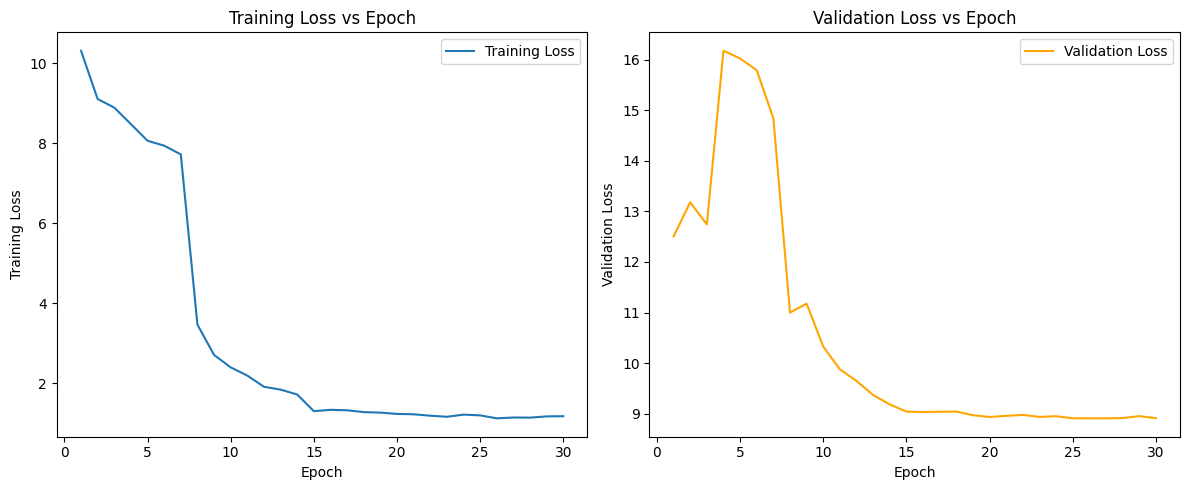

In [11]:
import matplotlib.pyplot as plt


epochs = range(1, len(training_loss) + 1)

# Creating subplots for training and validation loss
plt.figure(figsize=(12, 5))

# Plotting training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.title('Training Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

# Plotting validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, validation_loss, label='Validation Loss', color='orange')
plt.title('Validation Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

In [12]:
from sklearn.metrics import classification_report
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

y_true = list()
y_pred = list()
model.to(device)
with torch.no_grad():
    for test_data in test_loader:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        test_images, test_labels = test_data[0].to(device), test_data[1].to(device)
        pred = model(test_images.float()).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())
            
print(classification_report(y_true, y_pred, target_names=list(food_dict.keys()), digits=4))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


                  precision    recall  f1-score   support

       Banh cuon     0.8952    0.8605    0.8775       129
        Mi quang     0.7785    0.8056    0.7918       144
Banh trang nuong     0.8921    0.8322    0.8611       149
        Goi cuon     0.6085    0.6684    0.6370       193
        Banh gio     0.7739    0.8725    0.8203       102
         Bun mam     0.8034    0.8246    0.8139       228
       Canh chua     0.6918    0.7594    0.7240       133
        Nem chua     0.8686    0.9225    0.8947       129
        Bun rieu     0.8173    0.9641    0.8846       167
        Banh duc     0.9850    0.9813    0.9832       268
        Banh pia     0.9775    0.9775    0.9775        89
       Banh canh     0.8828    0.8188    0.8496       138
       Banh khot     0.9530    0.8931    0.9221       159
    Banh bot loc     0.9763    0.8766    0.9238       235
        Banh can     0.8077    0.6863    0.7420       306
  Bun thit nuong     0.9681    0.9891    0.9785       184
      Banh ch